In [1]:
library(BayesSpace)
library(ggplot2)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

# mouse brain

In [2]:
input_path <- "/home/uqysun19/60days/10x_visium/mouse_brain_coronal"

In [3]:
sce <- readVisium(input_path)

In [14]:
n_cluster <- 19
name <- "mouse_brain_coronal"
results_path <- paste0("/home/uqysun19/60days/BayesSpace_results/", name)


In [15]:
set.seed(1)
sce <- spatialPreprocess(sce, platform="Visium")

In [16]:
sce <- spatialCluster(sce, q=n_cluster, d=50, platform='Visium',
                        nrep=50000, gamma=3, save.chain=TRUE)

Neighbors were identified for 2702 out of 2702 spots.

Fitting model...

Calculating labels using iterations 1000 through 50000.



Saving 6.67 x 6.67 in image



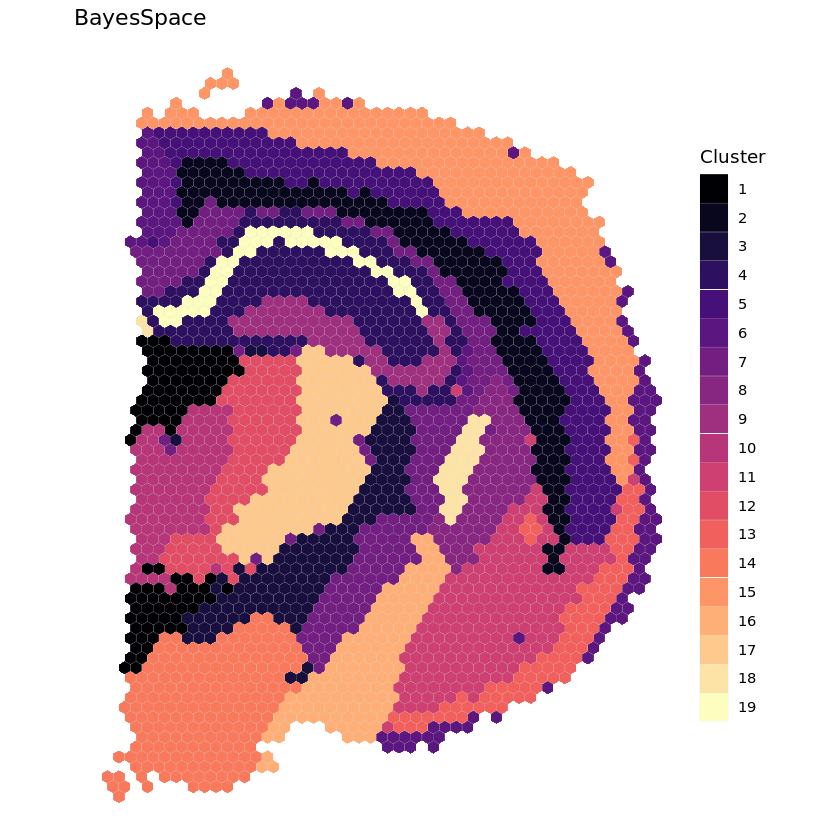

In [17]:
clusterPlot(sce, palette=NULL, size=0.05) +
  scale_fill_viridis_d(option = "A", labels = 1:19) +
  labs(title="BayesSpace")
ggsave(paste0(results_path, "_clustering.png"), dpi=300)

In [18]:
write.csv(sce@colData, paste0(results_path, "clustering_label.csv"), 
          row.names=T, col.names=T, quote=F)

Warning message in write.csv(sce@colData, paste0(results_path, "clustering_label.csv"), :
“attempt to set 'col.names' ignored”


# Human brain

In [13]:
name <- "151673"

dlpfc <- getRDS("2020_maynard_prefrontal-cortex", "151673")

set.seed(101)
dec <- scran::modelGeneVar(dlpfc)
top <- scran::getTopHVGs(dec, n = 2000)

set.seed(102)
dlpfc <- scater::runPCA(dlpfc, subset_row=top)

## Add BayesSpace metadata
dlpfc <- spatialPreprocess(dlpfc, platform="Visium", skip.PCA=TRUE)

using temporary cache /var/tmp/pbs.32231.delta2/Rtmpn6MfzR/BiocFileCache

adding rname 'https://fh-pi-gottardo-r.s3.amazonaws.com/SpatialTranscriptomes/2020_maynard_prefrontal-cortex/151673.rds'



In [ ]:
q <- 7  # Number of clusters
d <- 15  # Number of PCs

## Run BayesSpace clustering
set.seed(104)
dlpfc <- spatialCluster(dlpfc, q=q, d=d, platform='Visium',
                        nrep=50000, gamma=3, save.chain=TRUE)

## We recoded the cluster labels to match the expected brain layers
labels <- dplyr::recode(dlpfc$spatial.cluster, 3, 4, 5, 6, 2, 7, 1)

## View results
clusterPlot(dlpfc, label=labels, palette=NULL, size=0.05) +
  scale_fill_viridis_d(option = "A", labels = 1:7) +
  labs(title="BayesSpace")

Neighbors were identified for 3638 out of 3639 spots.

Fitting model...



In [2]:
?getRDS

In [ ]:
# #!/bin/bash

# qsub -N mouse_brain_coronal -v file=mouse_brain_coronal.r BayesSpace.pbspro
# qsub -N mouse_brain_sagittal_anterior_1 -v file=mouse_brain_sagittal_anterior_1.r BayesSpace.pbspro
# qsub -N mouse_brain_sagittal_anterior_2 -v file=mouse_brain_sagittal_anterior_2.r BayesSpace.pbspro
# qsub -N mouse_brain_sagittal_posterior_1 -v file=mouse_brain_sagittal_posterior_1.r BayesSpace.pbspro
# qsub -N mouse_brain_sagittal_posterior_2 -v file=mouse_brain_sagittal_posterior_2.r BayesSpace.pbspro
# qsub -N breast_cancer_1 -v file=breast_cancer_1.r BayesSpace.pbspro
# qsub -N breast_cancer_1_4c -v file=breast_cancer_1_4c.r BayesSpace.pbspro
# qsub -N breast_cancer_2 -v file=breast_cancer_2.r BayesSpace.pbspro
# qsub -N breast_cancer_2_4c -v file=breast_cancer_2_4c.r BayesSpace.pbspro


# qsub -N 1234 -v name=,cluster= BayesSpace_human_brain.pbspro
# qsub -N 1234 -v name=,cluster= BayesSpace_human_brain.pbspro
# qsub -N 1234 -v name=,cluster= BayesSpace_human_brain.pbspro
# qsub -N 1234 -v name=,cluster= BayesSpace_human_brain.pbspro
# qsub -N 1234 -v name=,cluster= BayesSpace_human_brain.pbspro
# qsub -N 1234 -v name=,cluster= BayesSpace_human_brain.pbspro
# qsub -N 1234 -v name=,cluster= BayesSpace_human_brain.pbspro
# qsub -N 1234 -v name=,cluster= BayesSpace_human_brain.pbspro
# qsub -N 1234 -v name=,cluster= BayesSpace_human_brain.pbspro
# qsub -N 1234 -v name=,cluster= BayesSpace_human_brain.pbspro
# qsub -N 1234 -v name=,cluster= BayesSpace_human_brain.pbspro
# qsub -N 1234 -v name=,cluster= BayesSpace_human_brain.pbspro





In [6]:
input_path <- "/home/uqysun19/60days/10x_visium/breast_cancer_1/outs"

In [7]:
sce <- readVisium(input_path)

In [8]:
n_cluster <- 8
name <- "breast_cancer_1"
results_path <- paste0("/home/uqysun19/60days/BayesSpace_results/", name)

In [9]:
set.seed(102)
sce <- spatialPreprocess(sce, platform="Visium")

In [10]:
sce <- spatialCluster(sce, q=n_cluster, d=15, platform='Visium',
                        nrep=5000, gamma=3, save.chain=TRUE)

Neighbors were identified for 3798 out of 3798 spots.

Fitting model...

Calculating labels using iterations 1000 through 5000.



Saving 6.67 x 6.67 in image



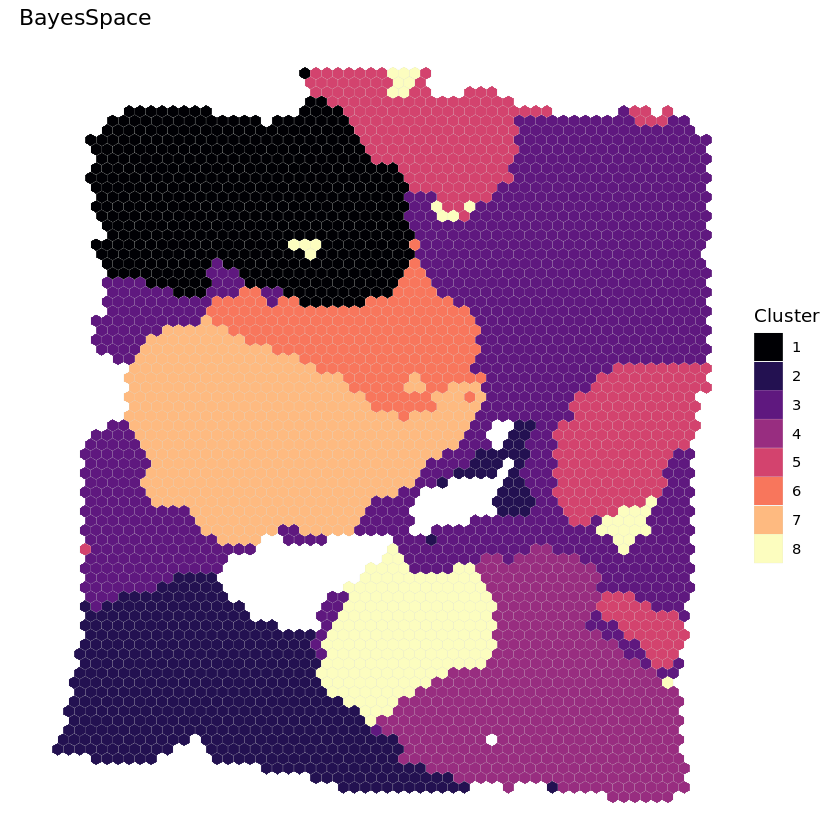

In [11]:
clusterPlot(sce, palette=NULL, size=0.05) +
  scale_fill_viridis_d(option = "A", labels = 1:n_cluster) +
  labs(title="BayesSpace")
ggsave(paste0(results_path, "_clustering.png"), dpi=300)